In [1]:
# Reference:
#    https://peterroelants.github.io/posts/gaussian-process-kernels/
#    https://distill.pub/2019/visual-exploration-gaussian-processes/
#    http://gregorygundersen.com/blog/2019/06/27/gp-regression/
#
import numpy as np
from numpy.linalg import inv, det, cholesky
from numpy.linalg import solve as backsolve
np.set_printoptions(precision=3,suppress=True)
from sklearn.metrics import mean_squared_error

import jax
from jax import grad, jit, vmap, device_put
import jax.numpy as jnp
import jax.numpy.linalg as jnp_linalg
from jax.experimental import optimizers
import itertools

import matplotlib.pyplot as plt
import matplotlib as mpl
# https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html
mpl.rcParams['lines.linewidth'] = 3
mpl.rcParams['font.size'] = 25
mpl.rcParams['font.family'] = 'Times New Roman'
cmap = plt.cm.get_cmap('bwr')

from tabulate import tabulate

import sys
sys.path.append('../kernel')
from jaxkern import (cov_se, cov_rq, cov_pe, LookupKernel, normalize_K, mtgp_k)

from plt_utils import plt_savefig, plt_scaled_colobar_ax
from gp import gp_regression_chol, run_sgd, log_func_default


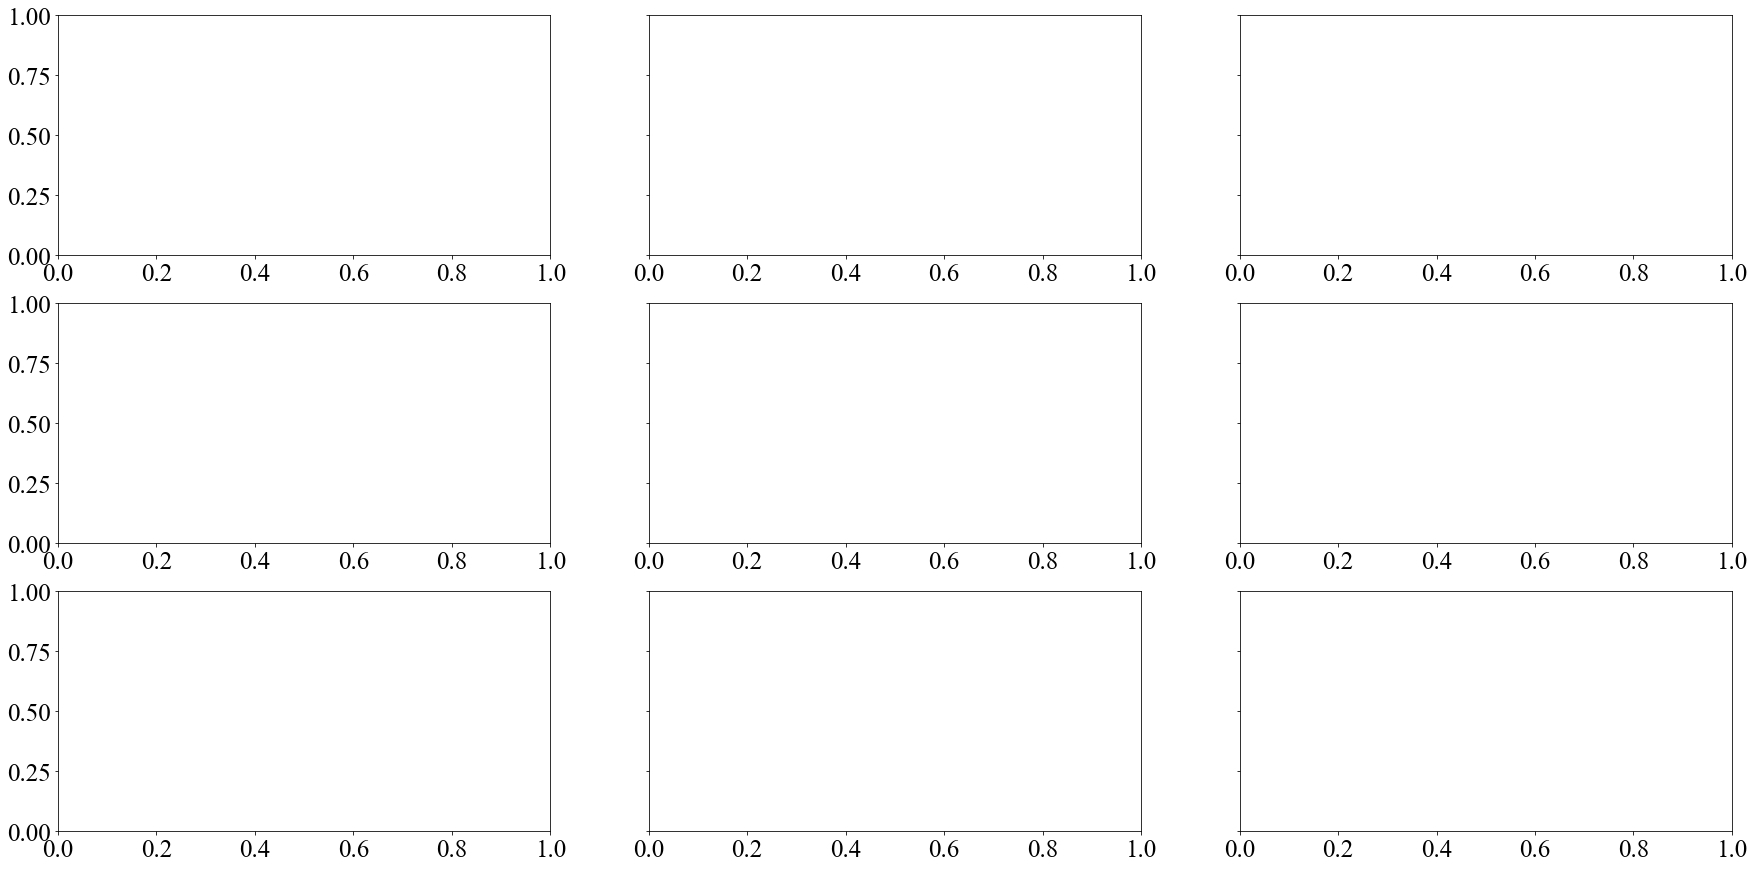

In [2]:

## Parameters 

xlim = (-2, 2)
ylim = (-3, 3)
n_train = 3
n_test = 100
σn = .3
logsn = np.log(σn)
ℓ = 1
ℓs = [.1, .3, 1]
train_sizes = [5, 10, 50]
lr = .0001
num_steps = 20


## Data

def f_gen(x):
    return np.sin(x)+np.sin(x*5)+np.cos(x*3)

def log_func(i, f, params):
    print(f"loss={f(params):.3f}\t"
          f"ℓ={np.exp(params['logℓ']):.3f}\t")

## Plotting

fig, axs = plt.subplots(3, 3, sharey=True)
fig.set_size_inches(30, 15)

np.random.seed(0)
X_test = np.expand_dims(np.linspace(*xlim, n_test), 1)
X_train_all = np.expand_dims(
    np.random.uniform(xlim[0], xlim[1], size=np.max(train_sizes)), 1)
ϵ_all = σn*np.random.rand(np.max(train_sizes), 1)


In [ ]:


# fitc 


# Reference
# - pyGPs: https://github.com/marionmari/pyGPs/blob/792f3c6cb9/pyGPs/Core/inf.py#L387
# - julia: https://github.com/STOR-i/GaussianProcesses.jl/blob/master/src/sparse/fully_indep_train_conditional.jl
# - gpflow: https://github.com/GPflow/GPflow/blob/develop/gpflow/models/sgpr.py#L263
# 






